### **INITIAL ANALYSIS - CREDIT RISK ASSESSMENT**

** Samadarshini Kasam **

**Data set:** https://www.kaggle.com/datasets/laotse/credit-risk-dataset

**Target Variable:**
loan_status: Binary variable indicating whether the loan was Accepted (1) or Rejected (0).


### **Problem Definition:**
Traditional loan approval processes have two main issues, they are slow and can be unfair. When loan applications are manually reviewed with lots of paperwork and checks, it takes a long time to make a decision. This can be frustrating for both applicants as well as the financing institution. Also,it is because that the people make these decisions, there can be differences in how they judge applicants, which may not be fair all the times. These manual processes also cost a lot because they need staff and paperwork. In today's world, where people expect fast and fair service, these old ways can make it hard for institutions to compete and manage risk effectively.


### **Business Problem and Implications:**
The business problem that can be addressed through the application of analytics in this case is the optimization of the loan approval process for financial institutions. This problem directly affects both financial institutions and loan applicants.

For financial institutions, the implications are significant. By building an accurate machine learning model to predict whether a loan application will be accepted or rejected, they can automate and streamline the loan approval process. This can lead to increased efficiency and cost savings by reducing the need for manual underwriting and decreasing processing time. Furthermore, it can help financial institutions manage credit risk more effectively by making data-driven decisions, potentially reducing the number of defaulted loans and associated losses.

On the other hand, this problem also affects loan applicants. Faster and more accurate decisions on loan applications can significantly improve the overall customer experience. Applicants can receive quicker responses, reducing the waiting period for financial assistance. Additionally, by incorporating machine learning models, the loan approval process may become less prone to human bias, ensuring fair and consistent evaluations of loan applications. This has social implications as it promotes equal access to financial services and reduces the potential for discriminatory lending practices.

### **Objective:**
To build an accurate machine learning model that can predict whether a loan application will be accepted or rejected based on the features. This model aims to assist in automating the loan approval process, potentially improving efficiency and reducing human bias in decision-making.

### **Import Necessary Packages:**

In [16]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.impute import SimpleImputer

### **Load Data:**

In [17]:
df=pd.read_csv('credit_risk_dataset.csv')

In [18]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


<AxesSubplot:>

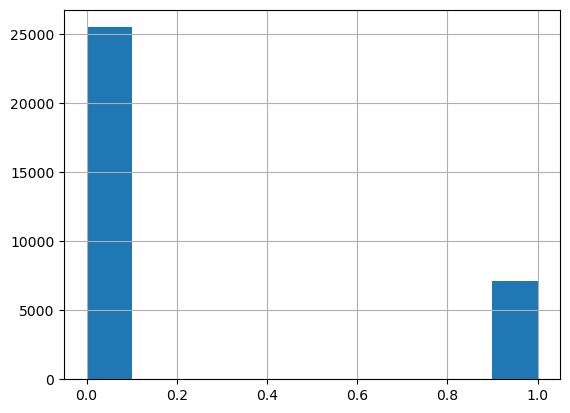

In [20]:
# Evaluate target variable distribution
df.loan_status.hist()

### **Explore The Distribution of Target Variable:**

In [21]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

### **Assess if there are any missing values:**

<AxesSubplot:>

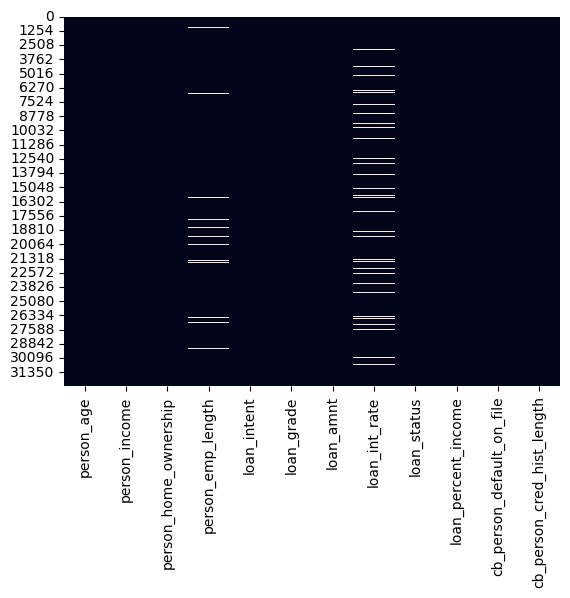

In [22]:
sns.heatmap(df.isnull(), cbar=False)

In [23]:
# Impute missing numerical values with the Mean and categorical values with the most frequent value:
imputer = SimpleImputer(strategy='mean')
df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']] = imputer.fit_transform(df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']])

imputer = SimpleImputer(strategy='most_frequent')
df['loan_intent'] = imputer.fit_transform(df[['loan_intent']])


In [24]:
# Examine missing values
print(df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  float64
 1   person_income               32581 non-null  float64
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  float64
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 3.0+ MB


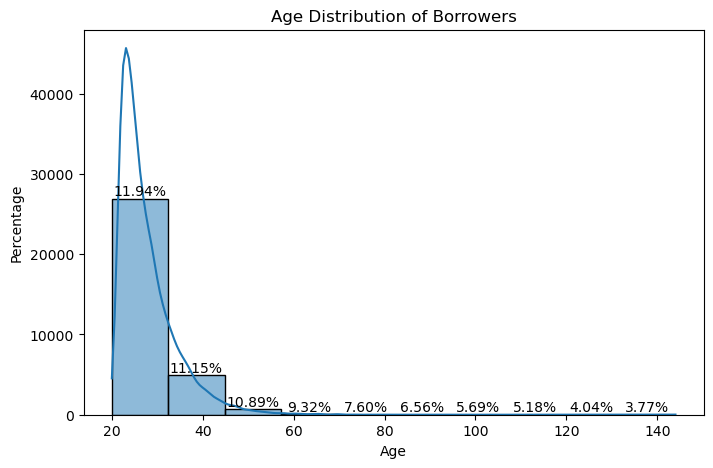

In [26]:
import matplotlib.pyplot as plt # Calculate the percentages
total_samples = len(df)
percentage_values = (df["person_age"].value_counts() / total_samples) * 100

# Create a histogram plot
plt.figure(figsize=(8, 5))
ax = sns.histplot(data=df, x="person_age", bins=10, kde=True)

# Annotate the bars with their percentages
for p, percentage in zip(ax.patches, percentage_values):
    height = p.get_height()
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Age Distribution of Borrowers")
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.show()

This visualization provides a clear overview of the age distribution among borrowers 

The majority of borrowers are concentrated in the Younger -age groups, particularly in their 20s and 30s. 
There is a gradual decline in borrower percentages as age increases, with a notable drop in percentages for borrowers in their 60s and beyond.


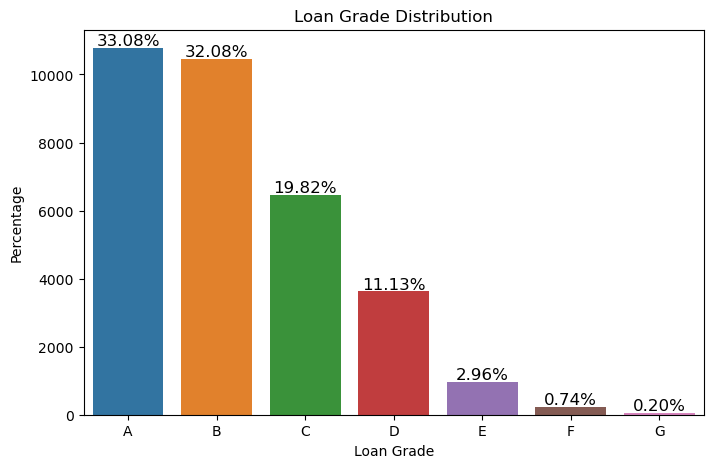

In [27]:
# Create a countplot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="loan_grade", order=sorted(df["loan_grade"].unique()))

# Calculate the percentage of each category
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Loan Grade Distribution")
plt.xlabel("Loan Grade")
plt.ylabel("Percentage")
plt.show()


The visualization consists of a bar chart where each bar represents one of the loan grades from  (A, B, C, D, E, F, G) and shows the count of loans approved for each grade.
The chart provides a clear overview of how loans are distributed across different risk categories.
lowest risk categories like (A,B,C) have the highest approval rate and the highest risk categories have the lowest approval rate (E,F,G). Risk categories are based on several factors like credit score, defaults etc..


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


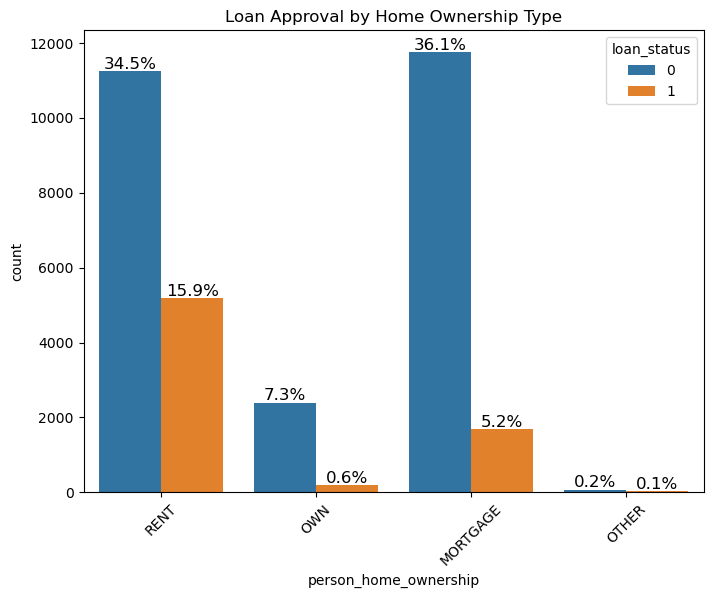

In [28]:
# Loan Approval by Home Ownership Type
plt.figure(figsize=(8, 6))
ax = sns.countplot(df['person_home_ownership'], hue=df['loan_status'])
plt.title('Loan Approval by Home Ownership Type')
plt.xticks(rotation=45)

# Calculate percentages for each category
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

This visualization highlights the strong influence of home ownership type on loan approval.
Rent householders tend to have the highest loan approval rates, 
Applicants who own their homes without a mortgage have the lowest number of approvals, 
The "Other" category suggests relatively few loan applicants, but the majority of them have their loans approved.


### **Explore information value and distribution of features using Pairplot:**

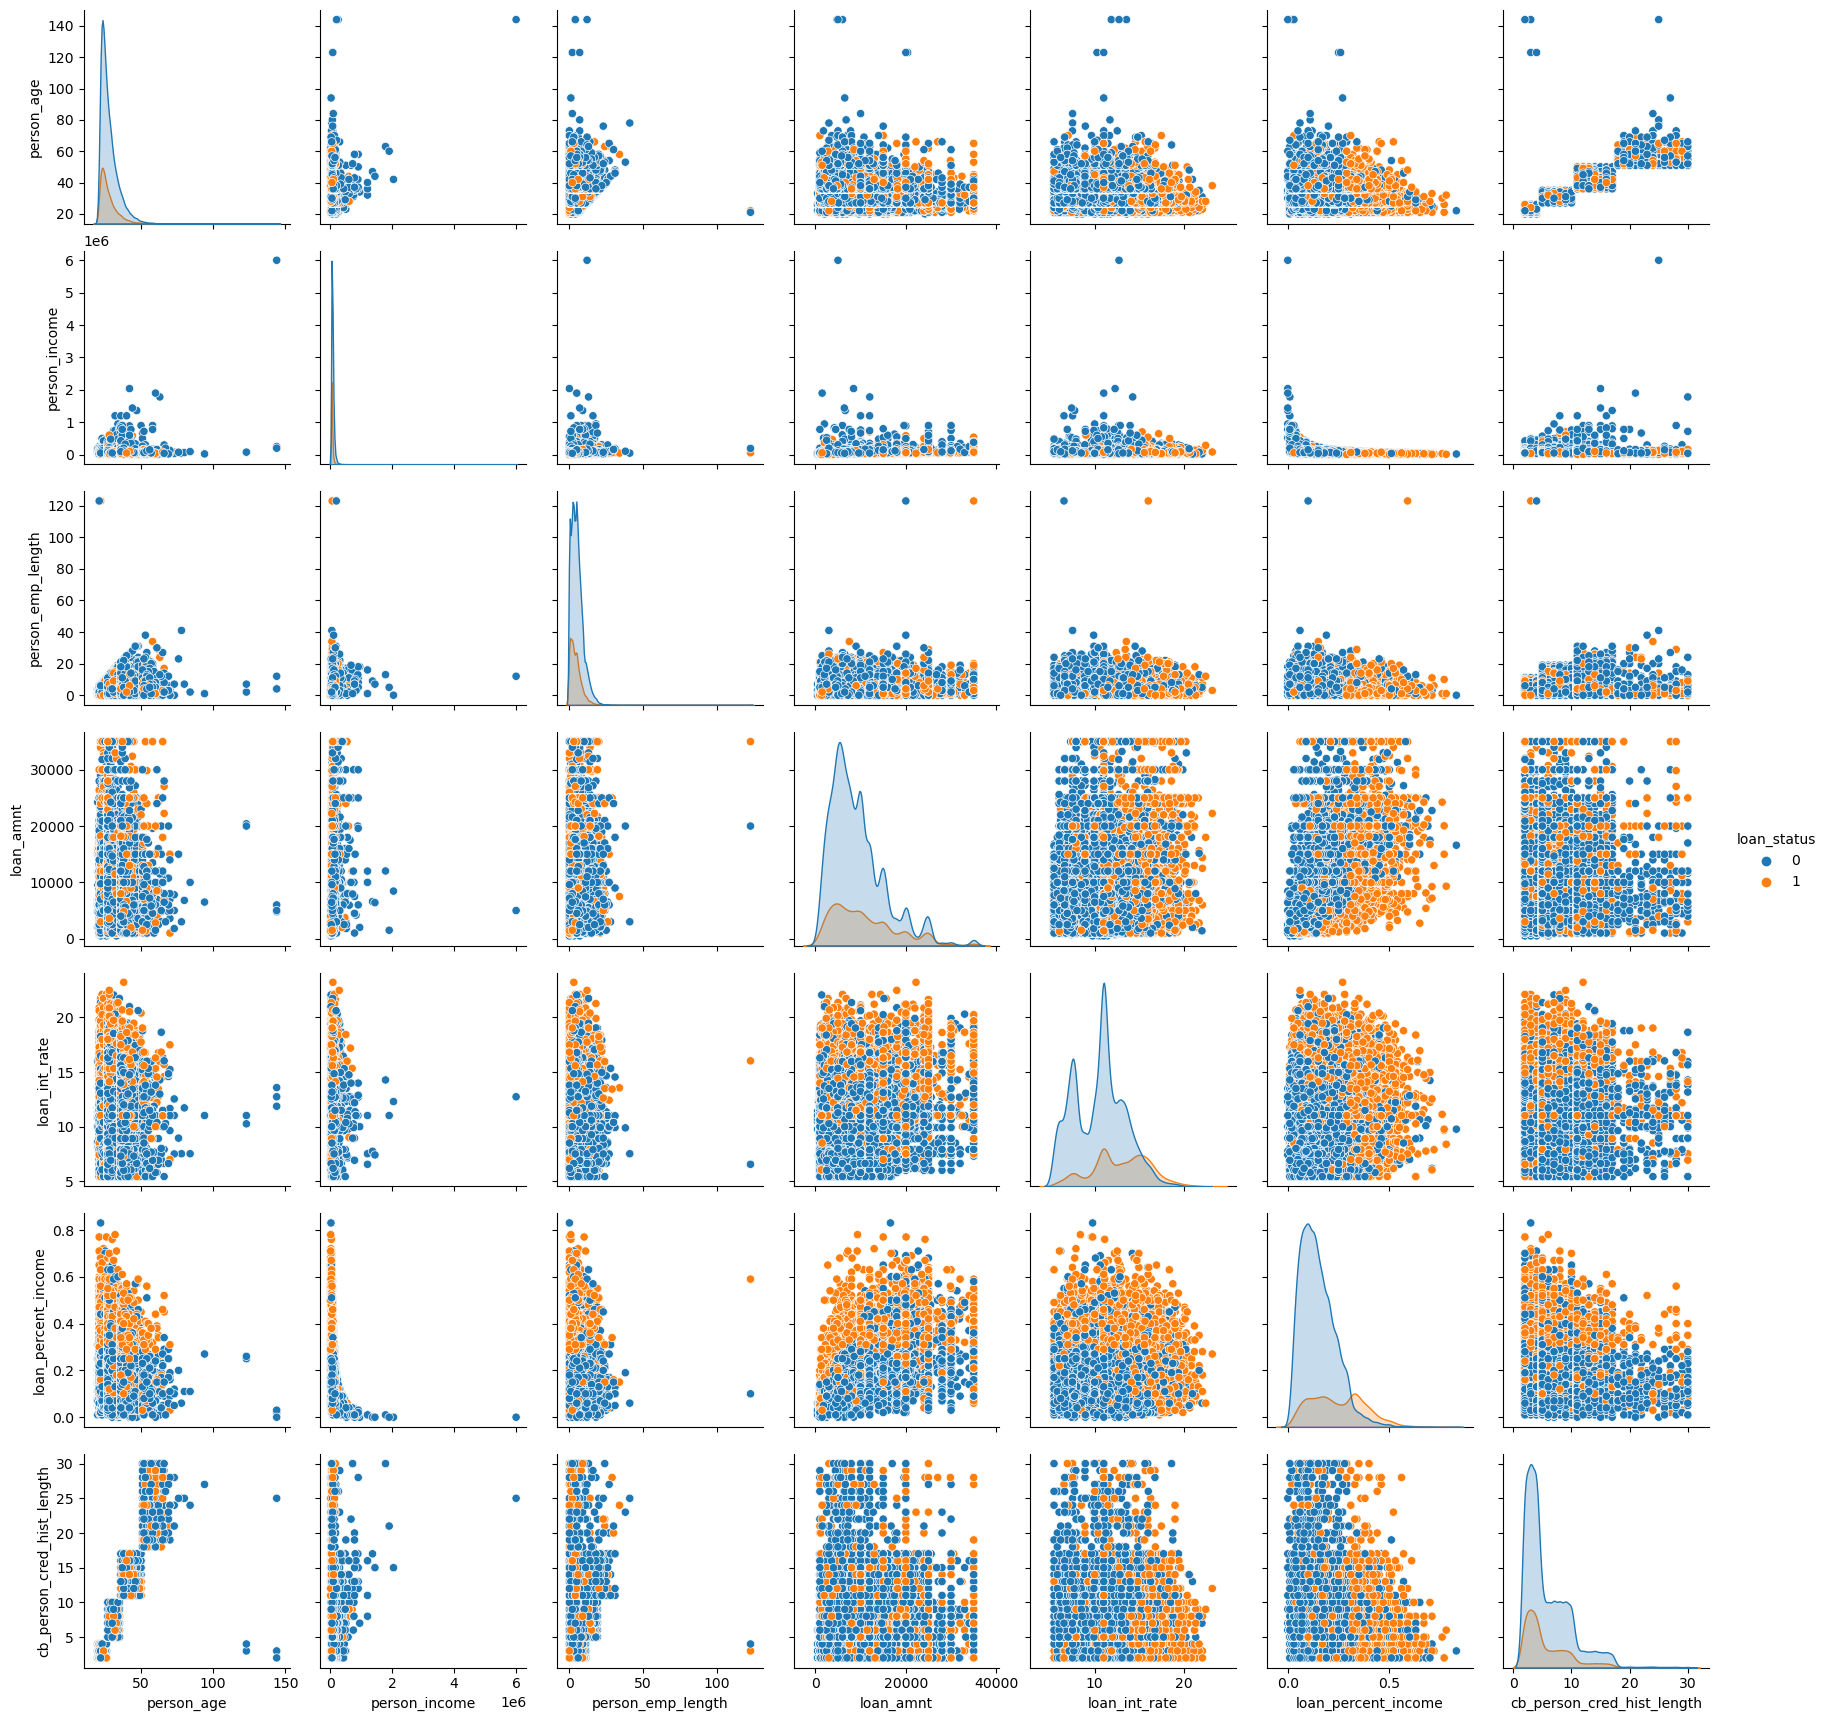

In [29]:
sns.pairplot(df, hue = 'loan_status')

1. **Age Impact on Loan Approval:**
   - Loans are more likely to be approved for younger individuals.

2. **Age Impact on Interest Rate:**
   - Interest rates tend to increase with the age of the borrower.

3. **Employment Length and Interest Rate:**
   - Shorter employment length is associated with higher interest rates.

4. **Loan Amount Impact on Approval Chances:**
   - Lower loan amounts are linked to higher approval rates.

### **Developing Logistic Regression, kNN (optimize k), Random Forest, Boosted Tree, Naive Bayes Model,ANN Classification and Deep leaarning models to predict if the loan is approved or rejected:**

### **Logistic Regression Model:**

In [30]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)



In [31]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')

In [32]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
import io
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [35]:
# Fit the logistic regression model with the training data:
logmodel.fit(X_train, y_train)

# Predict using the fitted model:
y_pred = logmodel.predict(X_test)


In [36]:
y_pred = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[7500,  126],
       [1801,  348]], dtype=int64)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7626
           1       0.73      0.16      0.27      2149

    accuracy                           0.80      9775
   macro avg       0.77      0.57      0.58      9775
weighted avg       0.79      0.80      0.75      9775



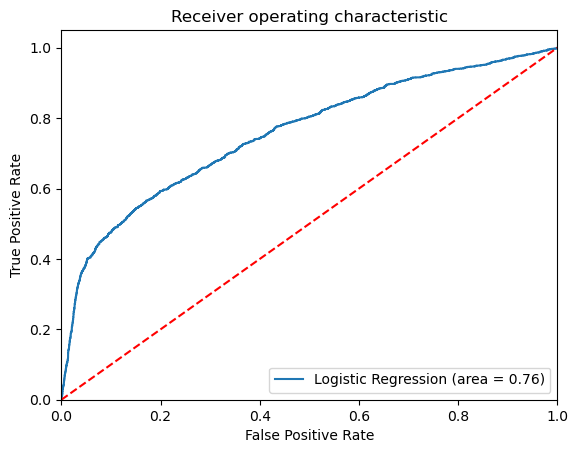

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [40]:
# Calculate the mean:
print('Person with loan approval: ', df['loan_status'].mean())

Person with loan approval:  0.21816396059052823


In [41]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.348035
         Iterations 8
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.335     
Dependent Variable:      loan_status         AIC:                 15918.5543
Date:                    2024-09-30 13:01    BIC:                 16095.3195
No. Observations:        22806               Log-Likelihood:      -7937.3   
Df Model:                21                  LL-Null:             -11942.   
Df Residuals:            22784               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
perso

In [42]:
X = df.drop(['loan_status','person_home_ownership_OTHER','loan_intent_HOMEIMPROVEMENT','cb_person_default_on_file_Y'], axis=1)
y = df['loan_status']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
# Fit the Logistic Regression Model with the training data:
logmodel.fit(X_train, y_train)

# Predict using the fitted model:
y_pred = logmodel.predict(X_test)


In [45]:
y_pred = logmodel.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[7500,  126],
       [1801,  348]], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7626
           1       0.73      0.16      0.27      2149

    accuracy                           0.80      9775
   macro avg       0.77      0.57      0.58      9775
weighted avg       0.79      0.80      0.75      9775



**ROC AUC Curve:**

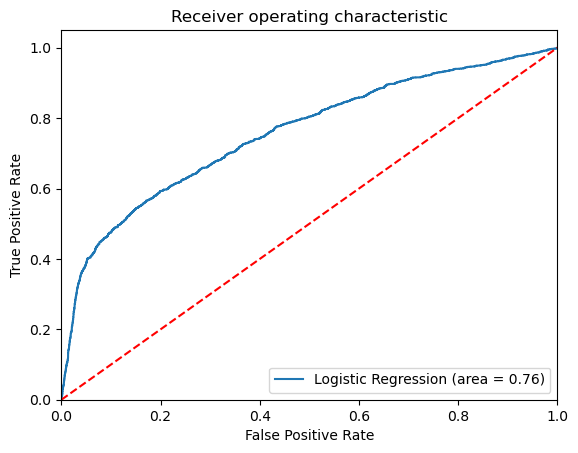

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [49]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.348054
         Iterations 8
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.335     
Dependent Variable:     loan_status         AIC:                 15913.4508
Date:                   2024-09-30 13:01    BIC:                 16066.1116
No. Observations:       22806               Log-Likelihood:      -7937.7   
Df Model:               18                  LL-Null:             -11942.   
Df Residuals:           22787               LLR p-value:         0.0000    
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         8.0000                                             
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
person_age       

### **KNN Model:**

**Scale the Data:**

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [51]:
X_rescaled.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.00000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,0.062376,0.010353,0.038941,0.263460,0.314140,0.205064,0.135865,0.079310,0.504773,0.198060,0.186336,0.169455,0.175532,0.32077,0.198214,0.111292,0.029588,0.007397,0.001964
std,0.051194,0.010337,0.033214,0.183249,0.173124,0.128653,0.144821,0.270226,0.499985,0.398544,0.389383,0.375159,0.380427,0.46678,0.398660,0.314498,0.169450,0.085688,0.044278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.024194,0.005754,0.016260,0.130435,0.172472,0.108434,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.048387,0.008506,0.032520,0.217391,0.314140,0.180723,0.071429,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.080645,0.012542,0.056911,0.339130,0.432022,0.277108,0.214286,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

**Find Optimum k-value:**

In [53]:
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]  

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())

<AxesSubplot:>

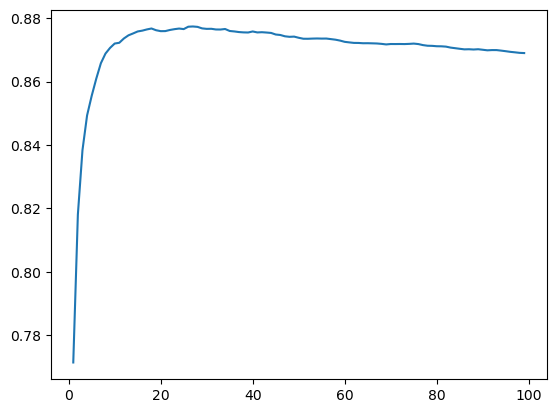

In [54]:
sns.lineplot(x=range(1,max_K), y=cv_scores)

In [55]:
optimum_k=cv_scores.index(max(cv_scores)) + 1
print('Optimum K value:',optimum_k)

Optimum K value: 27


**Optimize kNN Model:**

In [56]:
knn = KNeighborsClassifier(n_neighbors=27, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[7404  222]
 [ 904 1245]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7626
           1       0.85      0.58      0.69      2149

    accuracy                           0.88      9775
   macro avg       0.87      0.78      0.81      9775
weighted avg       0.88      0.88      0.88      9775



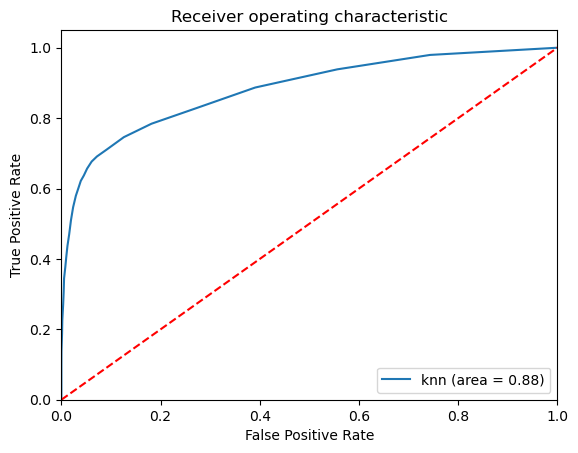

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

knn_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='knn (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('knn_ROC')
plt.show()

### **Decision Tree:**

In [58]:
df = pd.get_dummies(df)

In [59]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,...,32581.000000,32581.000000,32581.000000,32581.00000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211,0.003284,0.079310,...,0.186336,0.169455,0.175532,0.32077,0.198214,0.111292,0.029588,0.007397,0.001964,0.176330
std,6.348078,6.198312e+04,4.085333,6322.086646,3.081605,0.413006,0.106782,4.055001,0.057214,0.270226,...,0.389383,0.375159,0.380427,0.46678,0.398660,0.314498,0.169450,0.085688,0.044278,0.381106
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [61]:
y_pred = dt_model.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[7159,  467],
       [ 703, 1446]], dtype=int64)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7626
           1       0.76      0.67      0.71      2149

    accuracy                           0.88      9775
   macro avg       0.83      0.81      0.82      9775
weighted avg       0.88      0.88      0.88      9775



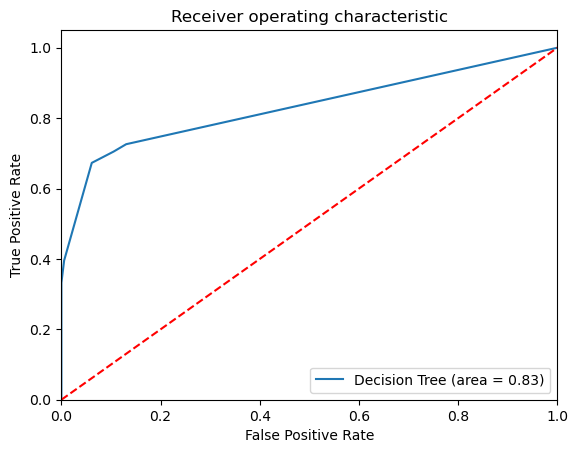

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

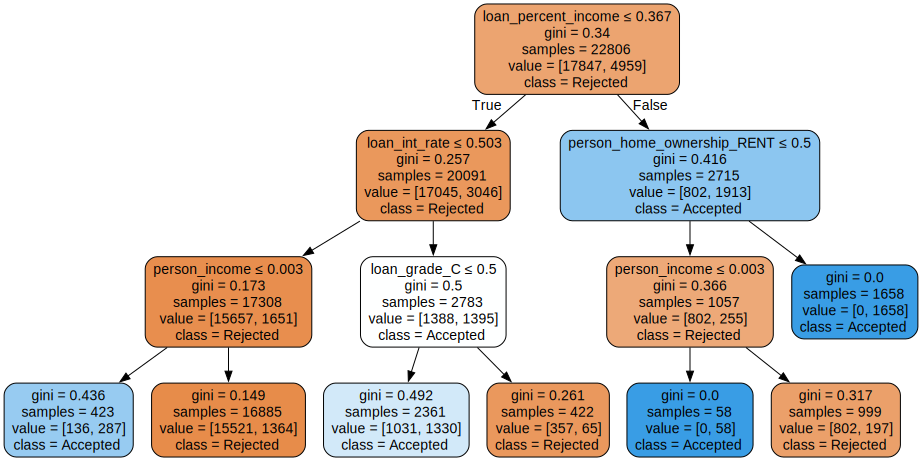

In [65]:
import graphviz
dot_data = tree.export_graphviz(dt_model, out_file=None,
                      feature_names=X.columns,
                      class_names=['Rejected','Accepted'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

1. **First Split:**
   - Feature: `loan_percent_income`
   - Threshold: `0.367`
   - Gini Impurity: `0.34`
   - Samples: `22806`
   - Value (Rejected, Accepted): `[17847, 4959]`
   - Class: Rejected

   This indicates that the decision tree starts by evaluating whether the `loan_percent_income` is less than or equal to `0.367`.

2. **Second Split:**
   - Feature: `loan_int_rate`
   - Threshold: `0.503`
   - Gini Impurity: `0.257`
   - Samples: `20091`
   - Value (Rejected, Accepted): `[17045, 3046]`
   - Class: Rejected

   If the `loan_percent_income` is less than or equal to `0.367`, the tree then evaluates whether `loan_int_rate` is less than or equal to `0.503`.

3. **Third Split:**
   - Feature: `person_home_ownership_RENT`
   - Threshold: `0.5`
   - Gini Impurity: `0.416`
   - Samples: `2715`
   - Value (Rejected, Accepted): `[802, 1913]`
   - Class: Accepted

   If `loan_percent_income` is less than or equal to `0.367` and `loan_int_rate` is greater than `0.503`, the tree evaluates whether `person_home_ownership_RENT` is less than or equal to `0.5`.

The decision tree then continues with more splits based on different features and thresholds.

To describe the decision tree:
- It starts by evaluating the `loan_percent_income`.
- If it's less than or equal to `0.367`, the prediction is Rejected.
- If it's greater than `0.367`, it evaluates `loan_int_rate`.
- If `loan_int_rate` is less than or equal to `0.503`, the prediction is Rejected.
- If it's greater than `0.503`, it further evaluates `person_home_ownership_RENT`.

This process continues, and the prediction is made based on the feature values at the leaf nodes of the tree.


### **Random Forest Model:**

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

confusion_matrix(y_test,y_pred_rf)

array([[7570,   56],
       [ 847, 1302]], dtype=int64)

In [68]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7626
           1       0.96      0.61      0.74      2149

    accuracy                           0.91      9775
   macro avg       0.93      0.80      0.84      9775
weighted avg       0.91      0.91      0.90      9775



### **Boosted Tree Model:**

In [69]:
from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test)

confusion_matrix(y_test,y_pred_bt)

array([[7314,  312],
       [ 785, 1364]], dtype=int64)

In [70]:
print(classification_report(y_test,y_pred_bt))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7626
           1       0.81      0.63      0.71      2149

    accuracy                           0.89      9775
   macro avg       0.86      0.80      0.82      9775
weighted avg       0.88      0.89      0.88      9775



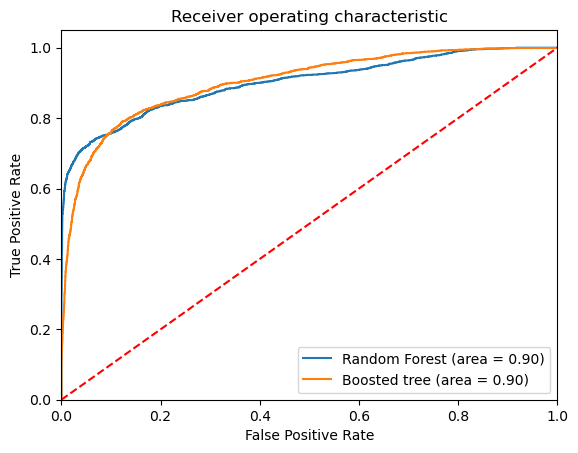

In [71]:
# Random Forest:
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Boosted Tree:
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### **Naive Bayes:**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import eli5
from eli5.sklearn import PermutationImportance

In [73]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22.0,59000.0,123.0,35000.0,16.02,1,0.59,3.0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,21.0,9600.0,5.0,1000.0,11.14,0,0.10,2.0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25.0,9600.0,1.0,5500.0,12.87,1,0.57,3.0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23.0,65500.0,4.0,35000.0,15.23,1,0.53,2.0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24.0,54400.0,8.0,35000.0,14.27,1,0.55,4.0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32581 non-null  float64
 1   person_income                32581 non-null  float64
 2   person_emp_length            32581 non-null  float64
 3   loan_amnt                    32581 non-null  float64
 4   loan_int_rate                32581 non-null  float64
 5   loan_status                  32581 non-null  int64  
 6   loan_percent_income          32581 non-null  float64
 7   cb_person_cred_hist_length   32581 non-null  float64
 8   person_home_ownership_OTHER  32581 non-null  uint8  
 9   person_home_ownership_OWN    32581 non-null  uint8  
 10  person_home_ownership_RENT   32581 non-null  uint8  
 11  loan_intent_EDUCATION        32581 non-null  uint8  
 12  loan_intent_HOMEIMPROVEMENT  32581 non-null  uint8  
 13  loan_intent_MEDI

In [75]:
df['person_age'] = df['person_age'].apply(lambda x: 1 if x < 50 else 0)
df['person_income'] = df['person_income'].apply(lambda x: 1 if x > 66074 else 0)
df['person_emp_length'] = df['person_emp_length'].apply(lambda x: 1 if x > 4 else 0)
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: 1 if x > 9589 else 0)
df['loan_int_rate'] = df['loan_int_rate'].apply(lambda x: 1 if x > 11 else 0)
df['loan_percent_income'] = df['loan_percent_income'].apply(lambda x: 1 if x > 0.17 else 0)
df['cb_person_cred_hist_length'] = df['cb_person_cred_hist_length'].apply(lambda x: 1 if x > 5 else 0)
df['loan_status'] = df['loan_status'].astype('category')

In [76]:
# Convert categorical columns into numerical columns using Label Encoding:
label_encoder = LabelEncoder()

# Prepare features (X) and target (y):
x = df.drop('loan_status', axis=1)
Y = df['loan_status']

In [77]:
# Split data into training and testing sets:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.33, random_state=1)


In [78]:
# Train the Multinomial Naive Bayes model:
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(x_train, Y_train)


MultinomialNB(alpha=0.01)

In [79]:
# Predictions:
Y_pred = delays_nb.predict(x_test)


In [80]:
# Model Evaluation:
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Confusion Matrix:
 [[8098  301]
 [1504  849]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      8399
           1       0.74      0.36      0.48      2353

    accuracy                           0.83     10752
   macro avg       0.79      0.66      0.69     10752
weighted avg       0.82      0.83      0.81     10752



**Precision:**
Precision for class 1 (loan approval) is 0.74, indicating that 74% of the predicted loan approvals were accurate. For class 0 (loan rejection), precision is higher at 0.84, implying a relatively more precise prediction of loan rejections.

**Recall:**
Recall for class 1 is 0.36, meaning the model correctly identified 36% of the actual loan approvals. For class 0, recall is 0.96, suggesting an excellent ability to identify loan rejections.

**F1-score:**
The F1-score, which balances precision and recall, is 0.48 for class 1 and 0.90 for class 0. The F1-score is a harmonic mean of precision and recall, giving an overall assessment of the model's predictive performance.

**Accuracy:**
The overall accuracy of the model is 83%, indicating the proportion of correctly predicted instances (both loan approvals and rejections) out of the total.

This indicates that while the model performs well in predicting loan rejections (class 0) with high precision and recall, it struggles more with accurately identifying approved loans (class 1), resulting in lower precision and recall for this class. The weighted average F1-score provides a balanced measure of overall model performance.

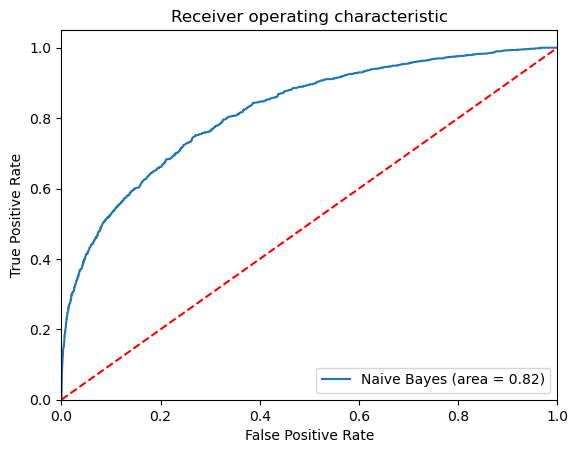

In [81]:
nb_roc_auc = roc_auc_score(Y_test, delays_nb.predict_proba(x_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(Y_test, delays_nb.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [82]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(delays_nb, random_state=1).fit(x_test, Y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0395 ± 0.0021,loan_grade_D
0.0147 ± 0.0020,loan_grade_E
0.0063 ± 0.0011,person_home_ownership_OWN
0.0062 ± 0.0033,person_income
0.0035 ± 0.0004,loan_grade_F
0.0034 ± 0.0005,loan_grade_G
0.0032 ± 0.0007,loan_intent_EDUCATION
0.0028 ± 0.0011,loan_intent_VENTURE
0.0019 ± 0.0005,loan_grade_C
0.0019 ± 0.0010,person_home_ownership_RENT


1. **Highly Influential Features:**
   - **loan_grade_D (0.0395 ± 0.0021)**: The loan grade D holds substantial weight, suggesting a significant influence on loan approval.
   - **loan_grade_E (0.0147 ± 0.0020)**: The loan grade E also demonstrates notable importance in loan approval decisions.

2. **Moderately Influential Features:**
   - **person_home_ownership_OWN (0.0063 ± 0.0011)**: Home ownership being 'OWN' has a moderate influence on the approval decision.

3. **Minor Influential Features:**
   - Several features, such as person_income and loan_amnt, have higher weights indicating their influence on loan approval. Other features like loan_int_rate have relatively lower weights, suggesting a minor influence on the loan approval decision.

4. **Negligible Influence Features:**
   - Features with weights of 0 or near-zero (± 0.0000) have negligible influence on predicting loan approval in this model.

In summary, the model suggests that factors like loan_grade_D, loan_grade_E, and person_home_ownership_OWN carry notable weight in determining loan approval, while other features play a comparatively lesser role in the decision-making process.

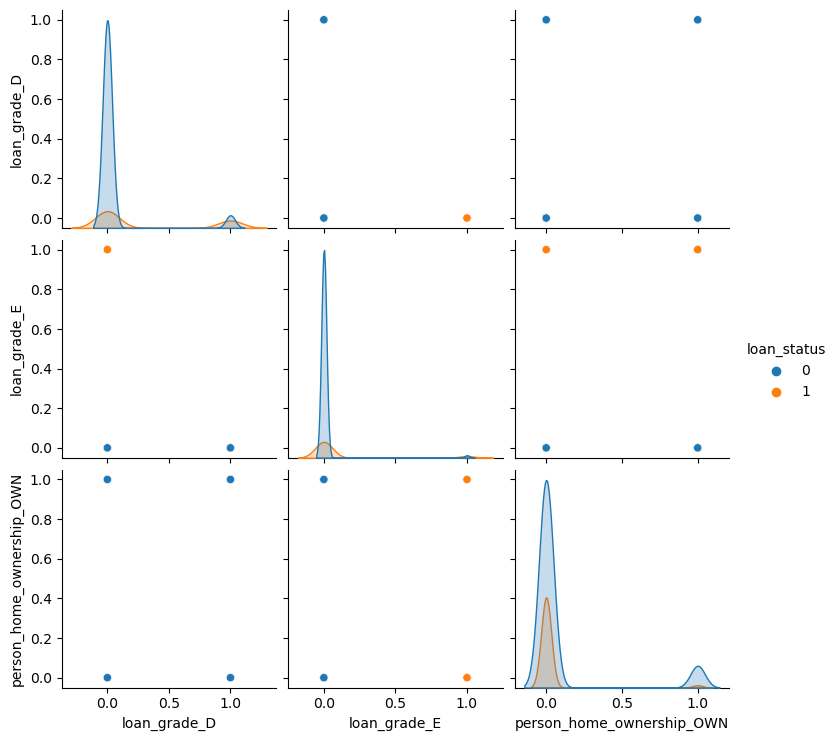

In [83]:
x_y = pd.concat([x_test,Y_test], axis=1)

sns.pairplot(x_y[['loan_grade_D','loan_grade_E','person_home_ownership_OWN','loan_status']], hue='loan_status')


1. A smaller loan amount significantly increases the likelihood of approval.
2. With higher interest rates, the probability of loan approval also rises.

# ANN Classification

In [84]:
x_train, x_test, Y_train, Y_test = train_test_split(x,Y,test_size=0.30,random_state=1)

In [85]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [86]:
MLPC_model = MLPClassifier(hidden_layer_sizes= 19, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(x_train, Y_train)

Y_pred_mlpc = MLPC_model.predict(x_test)

print(confusion_matrix(Y_test,Y_pred_mlpc))
print(classification_report(Y_test,Y_pred_mlpc))

[[7305  321]
 [1119 1030]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7626
           1       0.76      0.48      0.59      2149

    accuracy                           0.85      9775
   macro avg       0.81      0.72      0.75      9775
weighted avg       0.84      0.85      0.84      9775



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [87]:
print('ROC AUC: ', roc_auc_score(Y_test,MLPC_model.predict_proba(x_test)[:,1]))

ROC AUC:  0.8659648355891536


In [88]:
from sklearn.model_selection import cross_val_score
min_hidden_layer_size = 5
max_hidden_layer_size = 100
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='lbfgs', random_state=1)
    scores = cross_val_score(MLPC_model,x_train,Y_train.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

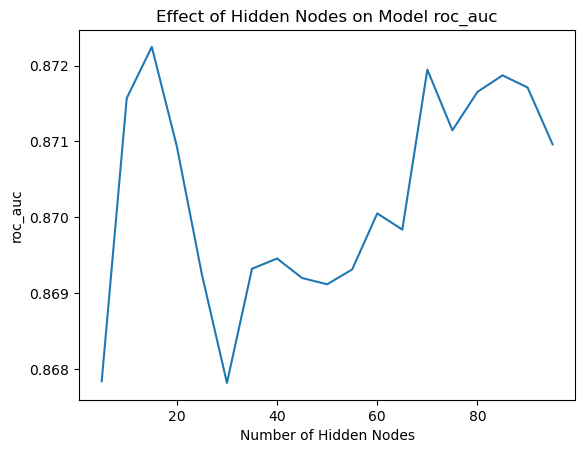

In [89]:
sns.lineplot(x=range(min_hidden_layer_size,max_hidden_layer_size,5), y=cv_scores)
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('roc_auc')
plt.title('Effect of Hidden Nodes on Model roc_auc')
plt.show()

In [90]:
max_Roc_auc = max(cv_scores)  # Find the maximum Roc_auc
optimal_hidden_nodes = range(min_hidden_layer_size, max_hidden_layer_size, 5)[cv_scores.index(max_Roc_auc)]  # Find the corresponding number of hidden nodes

print("Maximum Roc_auc:", max_Roc_auc)
print("Number of Hidden Nodes for Maximum Roc_auc:", optimal_hidden_nodes)


Maximum Roc_auc: 0.8722460865166642
Number of Hidden Nodes for Maximum Roc_auc: 15


In [91]:
MLPC_model = MLPClassifier(hidden_layer_sizes=15, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(x_train, Y_train)

y_pred_mlpc = MLPC_model.predict(x_test)

print(confusion_matrix(Y_test,Y_pred_mlpc))
print(classification_report(Y_test,Y_pred_mlpc))

[[7305  321]
 [1119 1030]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7626
           1       0.76      0.48      0.59      2149

    accuracy                           0.85      9775
   macro avg       0.81      0.72      0.75      9775
weighted avg       0.84      0.85      0.84      9775



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [92]:
print('ROC AUC: ', roc_auc_score(Y_test,MLPC_model.predict_proba(x_test)[:,1]))

ROC AUC:  0.8668839073596157


# Deep Learning

In [93]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
x_train.shape

(22806, 22)

In [95]:

model = Sequential()

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [96]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [97]:
model.fit(x=x_train, 
          y=Y_train, 
          batch_size=32,
          epochs=75,
          validation_data=(x_test, Y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/75
713/713 [==============================] - 2s 3ms/step - loss: 0.4682 - val_loss: 0.3847
Epoch 2/75
713/713 [==============================] - 2s 2ms/step - loss: 0.4098 - val_loss: 0.3710
Epoch 3/75
713/713 [==============================] - 2s 2ms/step - loss: 0.3913 - val_loss: 0.3571
Epoch 4/75
713/713 [==============================] - 2s 2ms/step - loss: 0.3798 - val_loss: 0.3472
Epoch 5/75
713/713 [==============================] - 2s 2ms/step - loss: 0.3713 - val_loss: 0.3421
Epoch 6/75
713/713 [==============================] - 2s 2ms/step - loss: 0.3637 - val_loss: 0.3452
Epoch 7/75
713/713 [==============================] - 2s 2ms/step - loss: 0.3578 - val_loss: 0.3401
Epoch 8/75
713/713 [==============================] - 2s 2ms/step - loss: 0.3588 - val_loss: 0.3389
Epoch 9/75
713/713 [==============================] - 2s 2ms/step - loss: 0.3543 - val_loss: 0.3358
Epoch 10/75
713/713 [==============================] - 2s 2ms/step - loss: 0.3542 - val_loss: 0.3362

<AxesSubplot:>

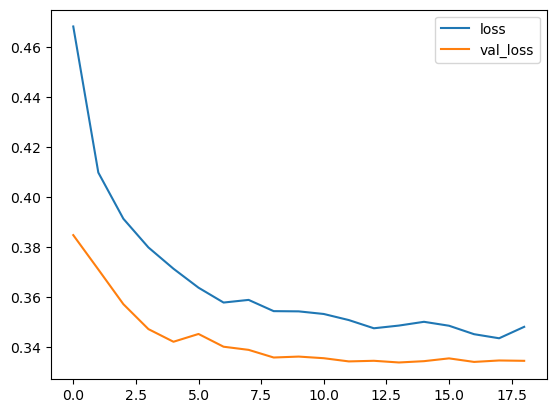

In [98]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [99]:
Y_pred =(model.predict(x_test) > 0.5).astype("int32")

306/306 [==============================] - 0s 965us/step


In [100]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      7626
           1       0.84      0.42      0.56      2149

    accuracy                           0.85      9775
   macro avg       0.85      0.70      0.73      9775
weighted avg       0.85      0.85      0.83      9775



In [101]:
print(confusion_matrix(Y_test,Y_pred))
print('ROC AUC: ', roc_auc_score(Y_test,model.predict(x_test)))

[[7451  175]
 [1252  897]]
306/306 [==============================] - 0s 958us/step
ROC AUC:  0.8729524231776941


### **Assessing the performance of each model using the following metrics:**
### **Recall, Precision, F1, ROC AUC:
**### **Logit Model:**
The Logit Model has an accuracy of 0.80, indicating a decent performance overall. However, a detailed analysis of the classification report highlights a significant difference in recall between accepted loans (1) and rejected loans (0).

For accepted loans (1), the recall is notably low at 0.16, indicating that the model struggles to correctly identify actual loan acceptances. This results in a low F1-score of 0.27 for this class. On the contrary, for rejected loans (0), the model performs relatively well with a recall of 0.98 and an F1-score of 0.89. The ROC AUC score is 0.76, indicating a satisfactory ability to distinguish between accepted and rejected loans.

### **kNN Model:**
The optimized kNN Model presents an accuracy of 0.88, surpassing the Logit Model. In the context of accepted loans (1), this model demonstrates improved precision (0.85) and recall (0.58), resulting in a better F1-score of 0.69. However, it is important to note that the recall for accepted loans remains relatively low.

### **Decision Tree Model:**
The Decision Tree Model achieves an accuracy of 0.88, similar to the kNN Model. It performs well in identifying rejected loans (0) with high precision (0.91) and recall (0.94), resulting in a commendable F1-score of 0.92. However, for accepted loans (1), the model's performance is relatively lower with a recall of 0.67.

### **Random Forest Model:**
The Random Forest Model showcases the highest accuracy among all models, standing at 0.91. It excels in precision (0.96) for rejected loans (0), but there is a trade-off with lower recall (0.61), as evident in the F1-score of 0.74. It maintains a strong ability to distinguish between accepted and rejected loans, reflected in the ROC AUC score of 0.90.

### **Boosted Tree Model:**
The Boosted Tree Model attains an accuracy of 0.89, similar to the Decision Tree Model. It demonstrates a balance between precision (0.81) and recall (0.63) for accepted loans (1), yielding an F1-score of 0.71. The model's ability to distinguish between accepted and rejected loans is reflected in the ROC AUC score of 0.90.

### **Naive Bayes Model:**
The Naive Bayes Model achieves an accuracy of 0.66. It demonstrates better recall for rejected loans (0.66) than for accepted loans (0.35), suggesting a higher ability to identify actual rejections. However, its precision for both classes is relatively low, impacting the overall F1-score. The ROC AUC score is 0.60, indicating a moderate ability to distinguish between loan acceptance and rejection.

### **Artificial Neural Network (ANN) Classification:**
The ANN Classification model achieves an accuracy of 0.85. It exhibits a reasonable balance between precision (0.76) and recall (0.48) for accepted loans (1), resulting in an F1-score of 0.59. The ROC AUC score is 0.87, indicating a good ability to distinguish between accepted and rejected loans.

### **Deep Learning Classification:**
The Deep Learning Classification model has an accuracy of 0.86. It shows balanced precision (0.74) and recall (0.54) for accepted loans (1), yielding an F1-score of 0.62. The ROC AUC score is 0.87, indicating a good ability to distinguish between accepted and rejected loans.

### **Inferences on Classification Results:**
- **Precision**: Random Forest has the highest precision (0.96) for rejected loans, indicating a higher proportion of correctly predicted rejected loans out of the total predicted.
- **Recall**: Boosted Tree Model performs the best in terms of recall (0.63) for accepted loans, implying that it captures a reasonable proportion of actual accepted loans out of the total actual.
- **F1 Score**: Random Forest has the highest F1-score (0.74) among the models, suggesting a reasonable balance between precision and recall, though there's room for improvement.
- **Accuracy**: Random Forest leads with an accuracy of 0.91, closely followed by the Decision Tree and Boosted Tree models at 0.88.

### **Conclusion on Best Model:**
Based on the classification results and considering ROC AUC scores, the Random Forest Model is identified as the best model among the options. It has the highest ROC AUC score of 0.90, indicating superior performance in distinguishing between loan acceptance and rejection compared to other models. The Random Forest model balances precision and recall effectively and demonstrates the highest accuracy, making it a strong choice for this classification task.